In [2]:
#install.packages("twitteR")

require(devtools)
install_version("tm", version = "0.7-1", repos = "http://cran.us.r-project.org")
#install.packages("wordcloud")
#install.packages("wordcloud2")
#install.packages("syuzhet")
#install.packages("lubridate")
#install.packages("ggplot2")
#install.packages("reshape2")
#install.packages("dplyr")
#install.packages("maps")


Loading required package: devtools
Installing tm
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpMRnc5E/devtools33f92fa503c/tm'  \
  --library='/home/fhissirou/R/x86_64-pc-linux-gnu-library/3.4'  \
  --install-tests 



In [4]:

library(twitteR)
library(tm)
library(wordcloud)
library(wordcloud2)
library(htmlwidgets)

library(maps)
library(syuzhet)
library(lubridate)
library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)


Loading required package: NLP
Loading required package: RColorBrewer

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate


Attaching package: ‘scales’

The following object is masked from ‘package:syuzhet’:

    rescale


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
consumer_key <- "QhK7GVJTA8TTMZLthHBOrM9Lc"
consumer_secret <- "ygKhLdqze8vLjM7tt4r28yH3jugMyb20dM0nffnKYXOkV5OlSj"
access_token <- "813554824126103552-ZVI6UyIqdn4FPMCJuSxxJSsqto3Kklo"
access_token_secret <- "mzLl9xFLPcUjVPgMGOD7HORCf71k6xJN8CbpSRJ79zJQS"

setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_token_secret)

[1] "Using direct authentication"


In [3]:
hashtags <- 'terrorisme + attentats'
terroriste_tweets <- twitteR::searchTwitter(hashtags, n = 2000, retryOnRateLimit = 1e3)

In [4]:
head(terroriste_tweets, n = 2)

[[1]]
[1] "MVPolitique: RT @l_poniatowski: Il n'y a plus aucune raison que la France accueille 300 imams étrangers pour le ramadan. En cette période d'attentats et…"

[[2]]
[1] "chris_valy: RT @PASCALPOINTUD: Une fois de plus Mr BELATTAR bat les records https://t.co/FtpkqdsZsq faire un parallèle avec une fête d'anniversaire et…"


In [5]:
terroriste_tweets_df<- twitteR::twListToDF(terroriste_tweets)
write.csv(terroriste_tweets_df, "./tweets_terroristes.csv", row.names=F)
summary(terroriste_tweets_df)

     text           favorited       favoriteCount      replyToSN        
 Length:2000        Mode :logical   Min.   :  0.000   Length:2000       
 Class :character   FALSE:2000      1st Qu.:  0.000   Class :character  
 Mode  :character                   Median :  0.000   Mode  :character  
                                    Mean   :  1.218                     
                                    3rd Qu.:  0.000                     
                                    Max.   :701.000                     
    created                    truncated        replyToSID       
 Min.   :2018-05-14 18:31:45   Mode :logical   Length:2000       
 1st Qu.:2018-05-15 13:53:50   FALSE:1876      Class :character  
 Median :2018-05-17 11:23:26   TRUE :124       Mode  :character  
 Mean   :2018-05-17 01:47:50                                     
 3rd Qu.:2018-05-18 07:08:35                                     
 Max.   :2018-05-20 20:35:15                                     
      id             replyT

In [6]:
df_terroriste = read.csv("./tweets_terroristes.csv", header=T)
dim(df_terroriste)

[1] 2000   16

In [7]:
corpus <- iconv(df_terroriste$text, to ="utf-8")
corpus <- Corpus(VectorSource(corpus))
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)

inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt lponiatowski il ny a plus aucune raison que la france accueille  imams étrangers pour le ramadan en cette période dattentats et
[2] rt pascalpointud une fois de plus mr belattar bat les records httpstcoftpkqdszsq faire un parallèle avec une fête danniversaire et
[3] rt pascalpointud une fois de plus mr belattar bat les records httpstcoftpkqdszsq faire un parallèle avec une fête danniversaire et
[4] rt pascalpointud une fois de plus mr belattar bat les records httpstcoftpkqdszsq faire un parallèle avec une fête danniversaire et
[5] rt lponiatowski il ny a plus aucune raison que la france accueille  imams étrangers pour le ramadan en cette période dattentats et


In [8]:
cleanset <- tm_map(corpus, removeWords, stopwords('french'))
removeURL <- function(x) gsub('http[[:alnum:]]*', '',x)
cleanset <- tm_map(cleanset, content_transformer(removeURL))
inspect(cleanset[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt lponiatowski  ny a plus aucune raison   france accueille  imams étrangers   ramadan   période dattentats 
[2] rt pascalpointud  fois  plus mr belattar bat  records  faire  parallèle   fête danniversaire                
[3] rt pascalpointud  fois  plus mr belattar bat  records  faire  parallèle   fête danniversaire                
[4] rt pascalpointud  fois  plus mr belattar bat  records  faire  parallèle   fête danniversaire                
[5] rt lponiatowski  ny a plus aucune raison   france accueille  imams étrangers   ramadan   période dattentats 


In [9]:

cleanset <- tm_map(cleanset, removeWords, c('cest', 'res','paris','france','Ici','encore',
                                            'gvt','pre','aucune','mlpofficiel','aucune','encore',
                                            'pre','gvt','quils','sncf', 'nicolassarkozy',
                                            'lponiatowski','disent','letat', 'listes'))

cleanset <- tm_map(cleanset, stripWhitespace)
inspect(cleanset[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt ny a plus raison accueille imams étrangers ramadan période dattentats              
[2] rt pascalpointud fois plus mr belattar bat records faire parallèle fête danniversaire 
[3] rt pascalpointud fois plus mr belattar bat records faire parallèle fête danniversaire 
[4] rt pascalpointud fois plus mr belattar bat records faire parallèle fête danniversaire 
[5] rt ny a plus raison accueille imams étrangers ramadan période dattentats              


In [10]:
tdm <- TermDocumentMatrix(cleanset)
tdm

<<TermDocumentMatrix (terms: 1023, documents: 2000)>>
Non-/sparse entries: 19497/2026503
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

In [11]:
tdm <- as.matrix(tdm)
tdm[5:15, 20:35]

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
période,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
raison,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
ramadan,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
étrangers,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
bat,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
belattar,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
danniversaire,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
faire,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0
fois,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
fête,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


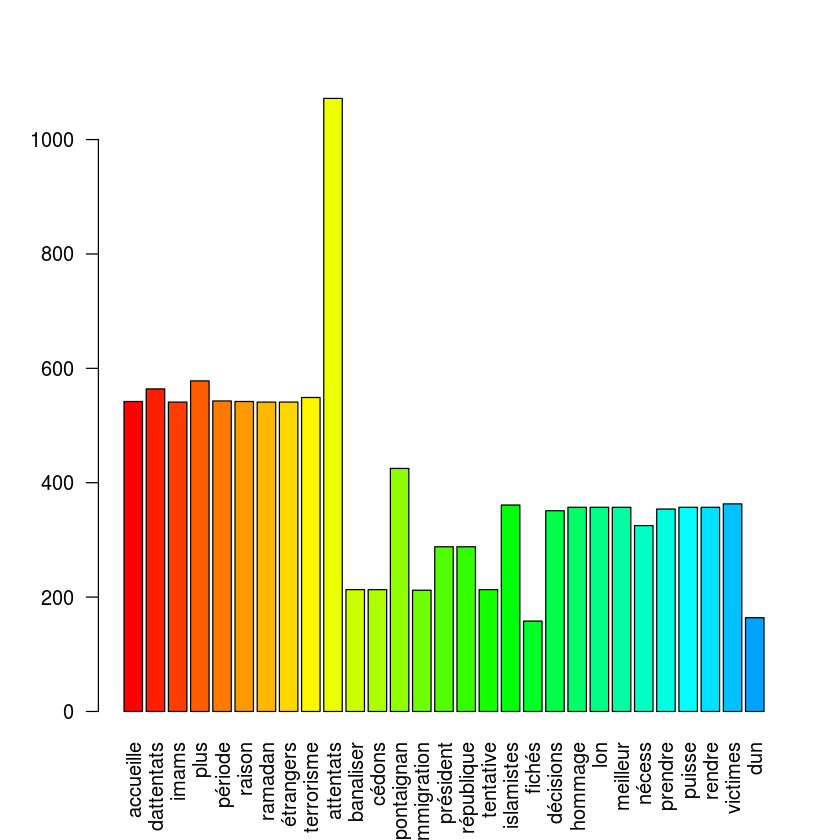

In [13]:
#plot
w <- rowSums(tdm)
w <- subset(w,w >=100)
barplot(w, las = 2, col = rainbow(50))

Warning message in brewer.pal(10, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”

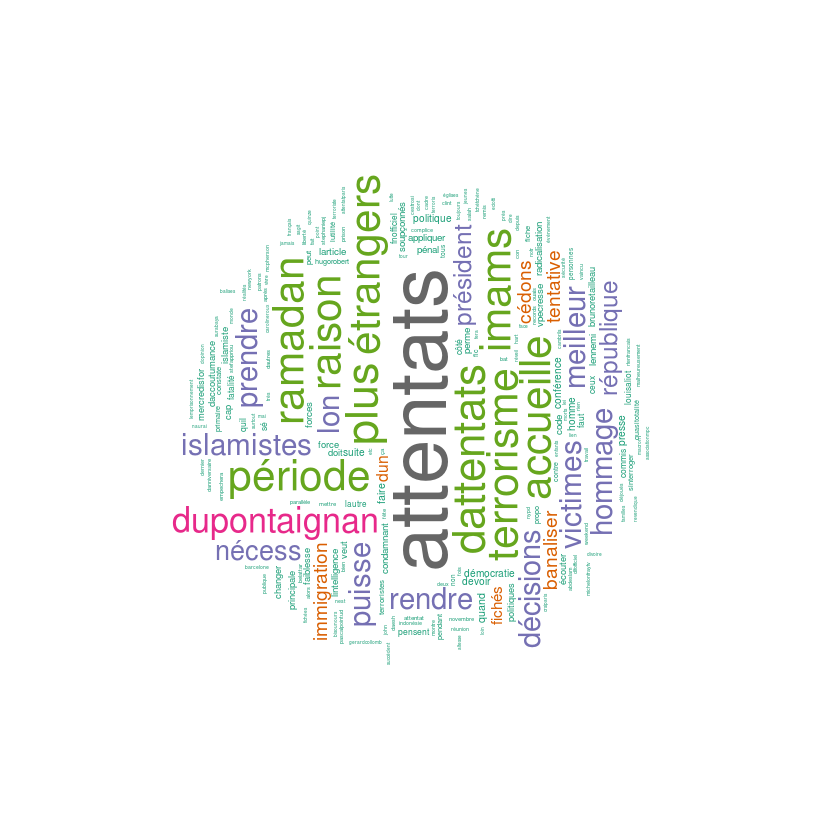

In [14]:
w <- sort(rowSums(tdm), decreasing = TRUE)
set.seed(222)
wordcloud(words = names(w), freq=w, max.words = 200, random.order = F, min.freq= 3, 
          colors = brewer.pal(10, 'Dark2'), scale = c(4,0.2), rot.per = 0.8) 

In [15]:

w <- data.frame(names(w), w)
colnames(w) <- c('word','freq')

In [16]:
# decommenter si vous utilisez rstudio
#wordcloud2(w, size = 0.5,shape = 'triangle',rotateRatio =0.3, minSize = 0.8)

#decommenter si vous utilisez Jupyter notebook
#m <- wordcloud2(w, size = 0.5,shape = 'triangle',rotateRatio =0.3, minSize = 0.8)
#htmlwidgets::saveWidget(m, file = "star.html", selfcontained = TRUE)
#simpleFix("star.html", "star.html")


In [17]:
tweets <- iconv(df_terroriste$text, to ="utf-8")
s <- get_nrc_sentiment(tweets)
head(s)

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0


In [18]:
get_nrc_sentiment('delay')

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
1,0,1,1,0,1,0,0,1,0


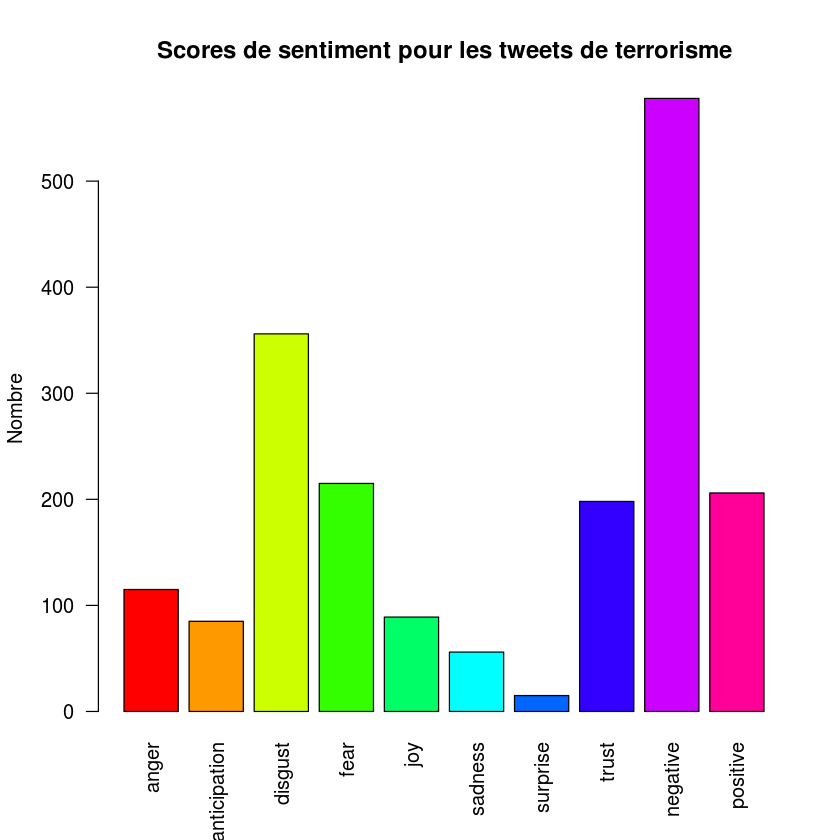

In [19]:
barplot(colSums(s), las= 2, col=rainbow(10), ylab='Nombre', main ="Scores de sentiment pour les tweets de terrorisme")